In [441]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
import io
import matplotlib.dates as mdates

In [20]:
def load_data(filename: str) -> pd.DataFrame:
    # tyto konstanty nemente, pomuzou vam pri nacitani
    headers = ["p1", "p36", "p37", "p2a", "weekday(p2a)", "p2b", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13a",
               "p13b", "p13c", "p14", "p15", "p16", "p17", "p18", "p19", "p20", "p21", "p22", "p23", "p24", "p27", "p28",
               "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", "p52", "p53", "p55a",
               "p57", "p58", "a", "b", "d", "e", "f", "g", "h", "i", "j", "k", "l", "n", "o", "p", "q", "r", "s", "t", "p5a"]

    # def get_dataframe(filename: str, verbose: bool = False) -> pd.DataFrame:
    regions = {
        "PHA": "00",
        "STC": "01",
        "JHC": "02",
        "PLK": "03",
        "ULK": "04",
        "HKK": "05",
        "JHM": "06",
        "MSK": "07",
        "OLK": "14",
        "ZLK": "15",
        "VYS": "16",
        "PAK": "17",
        "LBK": "18",
        "KVK": "19",
    }

    final_df = pd.DataFrame()

    with zipfile.ZipFile(filename, 'r') as data:
        for zipfiles in data.namelist():
            with data.open(zipfiles, 'r') as year:
                with zipfile.ZipFile(io.BytesIO(year.read())) as zip:
                    for region_name, region_code in regions.items():
                        with zip.open(f"{region_code}.csv", 'r') as csv_file:
                            df = pd.read_csv(csv_file,sep=';', names=headers, encoding='cp1250', low_memory=False)
                            df["region"] = region_name
                            final_df = pd.concat([final_df, df], ignore_index=True)
    
    return final_df

In [124]:
df = load_data("data.zip")

In [167]:
def parse_data(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    new_df = df.copy()
    new_df.drop_duplicates(subset='p1', inplace=True)
    new_df["date"] = pd.to_datetime(new_df["p2a"], format="%Y-%m-%d")
    new_df.drop(columns=["p2a"], inplace=True)
    cols_to_skip = ["date", "region"]
    category_cols = ["p47", "h", "i", "k", "l", "p", "q", "t"]
    float_cols = ["a", "b", "d", "e", "f", "g", "n", "o"]

    for col in category_cols:
        new_df[col] = new_df[col].astype("category")

    for col in float_cols:
        new_df[col] = new_df[col].str.replace(",", ".")

    for col in new_df.columns:
        if col not in cols_to_skip and col not in category_cols:
                new_df[col] = pd.to_numeric(new_df[col], errors="coerce")


    if verbose:
        orig_memory_usage = df.memory_usage(deep=True).sum()
        new_memory_usage = new_df.memory_usage(deep=True).sum()

        orig_memory_usage_mb = orig_memory_usage / 1e6
        new_memory_usage_mb = new_memory_usage / 1e6

        print(f"Original size: {orig_memory_usage_mb:.2f} MB")
        print(f"New size: {new_memory_usage_mb:.2f} MB")

    
    return new_df
    

In [33]:
df

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,l,n,o,p,q,r,s,t,p5a,region
0,2100160001,4,NaN,2016-01-01,5,55,1,1,0,2,...,NaN,711403.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,PHA
1,2100160002,4,NaN,2016-01-01,5,130,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
2,2100160003,5,NaN,2016-01-01,5,100,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
3,2100160004,6,NaN,2016-01-01,5,120,9,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
4,2100160005,6,NaN,2016-01-01,5,2560,2,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707022,190910224060,3,21030.0,2022-12-28,3,835,5,0,0,2,...,21030,NaN,NaN,NaN,NaN,511587.0,NaN,NaN,2,KVK
707023,190910224148,8,NaN,2022-12-27,2,1900,3,0,6,2,...,NaN,NaN,NaN,NaN,NaN,538434.0,554553.0,NaN,1,KVK
707024,190910224288,6,NaN,2022-12-30,5,1000,3,0,3,2,...,NaN,NaN,NaN,NaN,NaN,560464.0,550817.0,NaN,1,KVK
707025,190910224334,2,210.0,2022-12-30,5,1525,3,0,2,2,...,210,NaN,NaN,NaN,NaN,560286.0,NaN,NaN,1,KVK


In [71]:
df.memory_usage(deep=True).sum()

1088288105

In [166]:
object_columns = df.select_dtypes(include=['float']).columns
object_columns

Index(['p37', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p39', 'p45a', 'p48a',
       'p49', 'p50a', 'p50b', 'p51', 'p52', 'p55a', 'p57', 'p58', 'j', 'r',
       's'],
      dtype='object')

In [136]:
df["o"].unique()

array([nan, '0,009064', '0,066453', ..., '0,949151', '3,396823',
       '2,290515'], dtype=object)

In [126]:
df["o"].unique()

array([nan, '0,009064', '0,066453', ..., '0,949151', '3,396823',
       '2,290515'], dtype=object)

In [222]:
modified_df = parse_data(df, True)

Original size: 1088.29 MB
New size: 380.92 MB


In [225]:
modified_df["p57"]

0         1.0
1         1.0
2         1.0
3         5.0
4         NaN
         ... 
707022    1.0
707023    NaN
707024    1.0
707025    1.0
707026    1.0
Name: p57, Length: 707023, dtype: float64

In [492]:
def plot_state(df: pd.DataFrame, fig_location: str = None,
               show_figure: bool = False):
    

    df_copy = df.copy()
    state_map = {
        7: 'invalida',
        6: 'nemoc, úraz apod.',
        5: 'pod vlivem alkoholu 1‰ a více',
        4: 'alkoholu, obsah alkoholu v krvi do 0,99 ‰',
        9: 'sebevražda',
        8: 'řidič při jízdě zemřel (infarkt apod.)'
    }

    df_copy['state'] = df_copy['p57'].map(state_map)

    grouped_data = df_copy.groupby(['region', 'state']).size().reset_index(name='count')

    sns.set_style("whitegrid")

    fig, axes = plt.subplots(3, 2, figsize=(10, 15), constrained_layout=True)
    fig.suptitle('Počet nehod dle stavu řidiče při nedobrém stavu')

    axes_flat = axes.flatten()

    for idx, (state, description) in enumerate(state_map.items()):
        ax = axes_flat[idx]
        sns.barplot(x='region', y='count', 
                    data=grouped_data[grouped_data['state'] == description], 
                    ax=ax, palette='ch:start=.2,rot=-.3', hue='count', dodge=False)
        ax.set_title(f"Stav řidiče: {description}")

        ax.set_xlabel('')
        ax.set_ylabel('')

        ax.get_legend().remove()

        if idx < 4:
            ax.set_xticklabels([])

        if idx > 3:
            ax.set_xlabel('Kraj')

        if idx % 2 == 0:
            ax.set_ylabel('Počet nehod')
        

    if fig_location:
        fig.savefig(fig_location)

    if show_figure:
        plt.show()


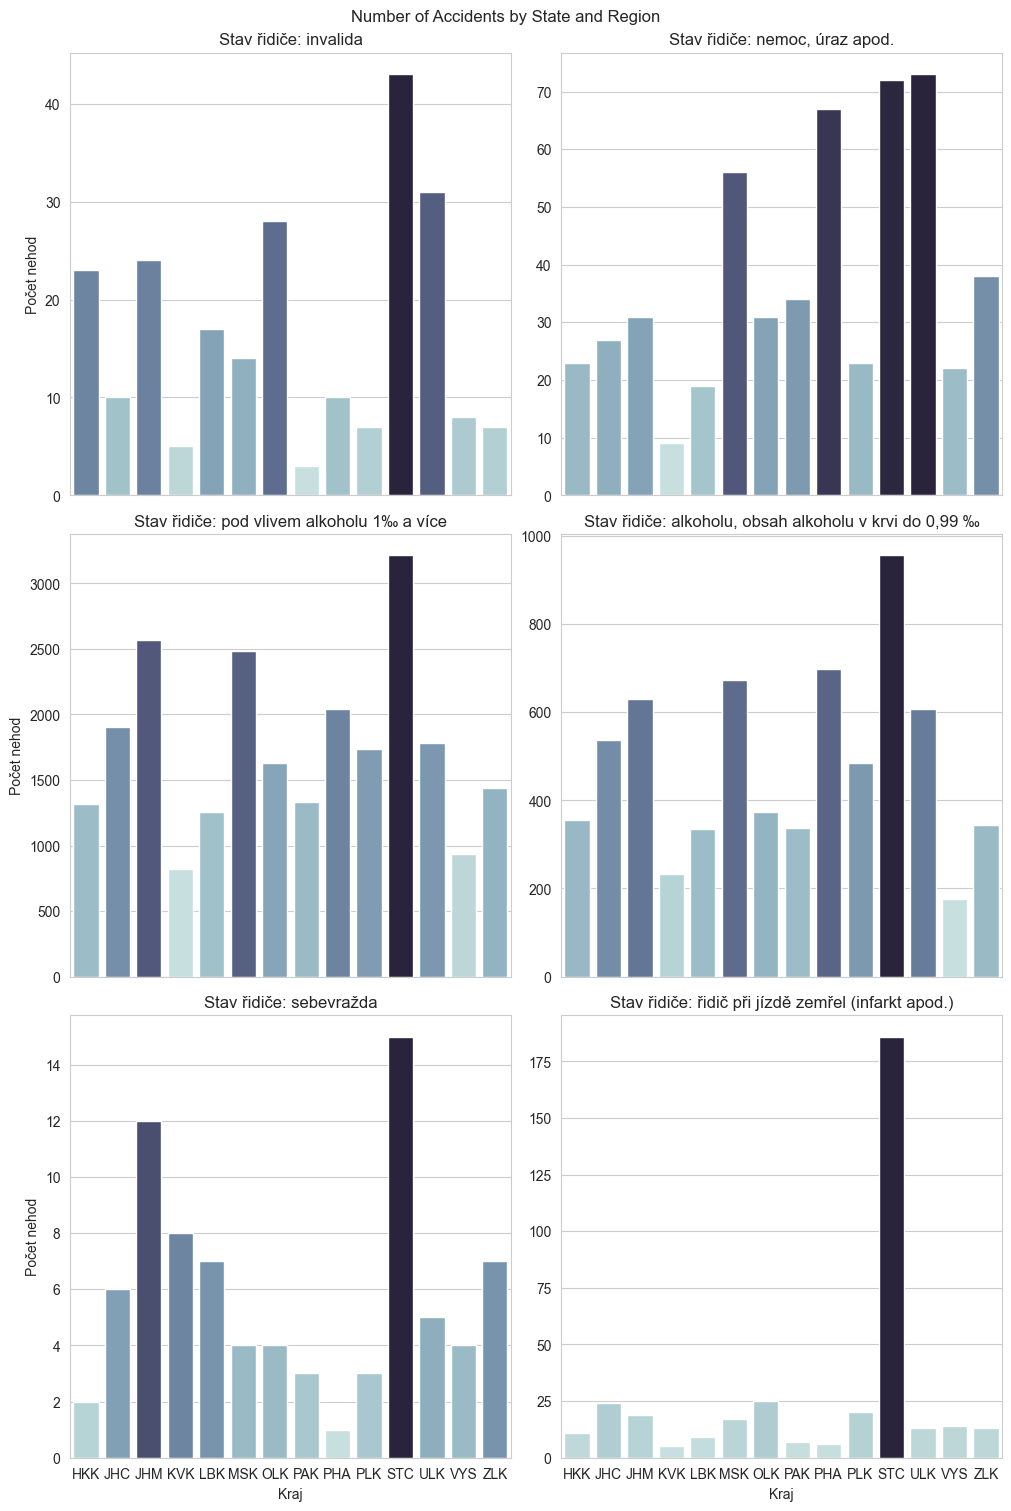

In [231]:
plot_state(modified_df, "01_state.png")

In [232]:
modified_df["p11"].unique()

array([2, 9, 0, 8, 4, 3, 6, 1, 5, 7])

In [362]:
def plot_alcohol(df: pd.DataFrame, fig_location: str = None,
                 show_figure: bool = False):
    df_copy = df.copy()
    df_copy["p2b"] = (df_copy["p2b"] // 100)
    df_copy = df_copy[df_copy["p2b"].between(0, 23)]

    df_copy["Pod vlivem"] = pd.cut(df_copy["p11"], bins=[0, 2, 9], labels=["Ne", "Ano"])

    grouped_data = df_copy.groupby(["region", "p2b", "Pod vlivem"]).size().reset_index(name="count")

    sns.set_style("whitegrid")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

    axes_flat = axes.flatten()

    regions = ["JHM", "MSK", "OLK", "ZLK"]

    regions_data = grouped_data[grouped_data['region'].isin(regions)]

    for idx, region in enumerate(regions):
        ax = axes_flat[idx]
        sns.barplot(x='p2b', y='count', hue='Pod vlivem', 
                    data=regions_data[grouped_data['region'] == region], 
                    ax=ax, hue_order=["Ano", "Ne"])
        ax.set_title(f'Kraj: {region}')
        ax.set_xlabel('Hodina')
        ax.set_ylabel('Počet nehod')

        ax.get_legend().remove()


    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(1.05, 0.5), title='Alkohol', frameon=False)

    if fig_location:
        fig.savefig(fig_location)

    if show_figure:
        plt.show()

/var/folders/ws/jlypk05s591dmf08q8lcvdcc0000gn/T/ipykernel_35850/235161184.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_copy.groupby(["region", "p2b", "Pod vlivem"]).size().reset_index(name="count")
/var/folders/ws/jlypk05s591dmf08q8lcvdcc0000gn/T/ipykernel_35850/235161184.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=regions_data[grouped_data['region'] == region],
/var/folders/ws/jlypk05s591dmf08q8lcvdcc0000gn/T/ipykernel_35850/235161184.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=regions_data[grouped_data['region'] == region],
/var/folders/ws/jlypk05s591dmf08q8lcvdcc0000gn/T/ipykernel_35850/235161184.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


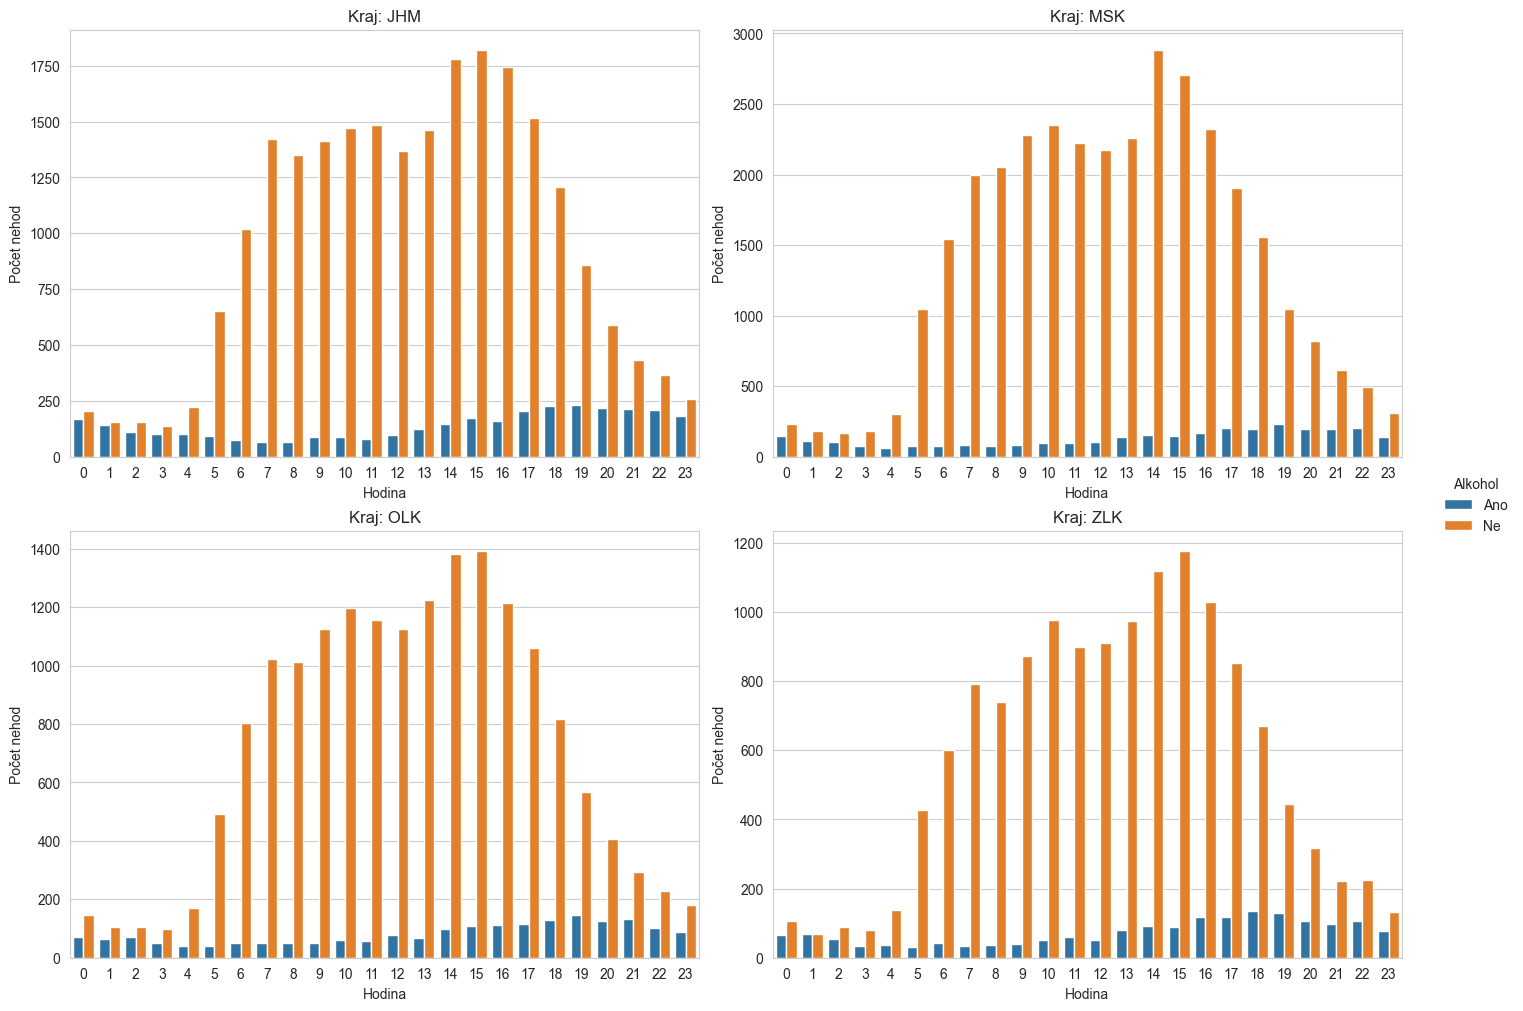

In [493]:
plot_alcohol(modified_df, "02_alcohol.png")

In [490]:
def plot_fault(df: pd.DataFrame, fig_location: str = None,
               show_figure: bool = False):

    df_copy = df.copy()

    fault_map = {
        1: 'Řidičem motorového vozidla',
        2: 'Řičičem nemotorového vozidla',
        3: 'Chodcem',
        4: 'Zvířetem'
    }

    df_copy['fault'] = df_copy['p10'].map(fault_map)

    pivot_df = df_copy.pivot_table(index=['date', 'region'], columns='fault', aggfunc='size', fill_value=0)

    monthly_data = pivot_df.groupby('region').resample('M', level=0).sum()

    stacked_monthly_data = monthly_data.stack().reset_index(name='count')
    stacked_monthly_data.columns = ['region', 'date', 'fault', 'count']


    start_date = pd.Timestamp('2016-01-01')
    end_date = pd.Timestamp('2023-01-01')
    regions_to_plot = ["JHM", "MSK", "OLK", "ZLK"]

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True, constrained_layout=True)
    axes_flat = axes.flatten()
    for i, region in enumerate(regions_to_plot):
        ax = axes_flat[i]
        region_data = stacked_monthly_data[stacked_monthly_data['region'] == region]
        sns.lineplot(x='date', y='count', hue='fault', data=region_data, ax=ax)
        ax.set_title(f'Kraj: {region}')
        ax.set_ylabel('Počet nehod')
        ax.set_xlabel('Období')
        ax.get_legend().remove()

        ax.set_xlim([start_date, end_date])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('01/%y'))

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(1.10, 0.5), title='Zavinění', frameon=False)

    if fig_location:
        fig.savefig(fig_location)

    if show_figure:
        plt.show()



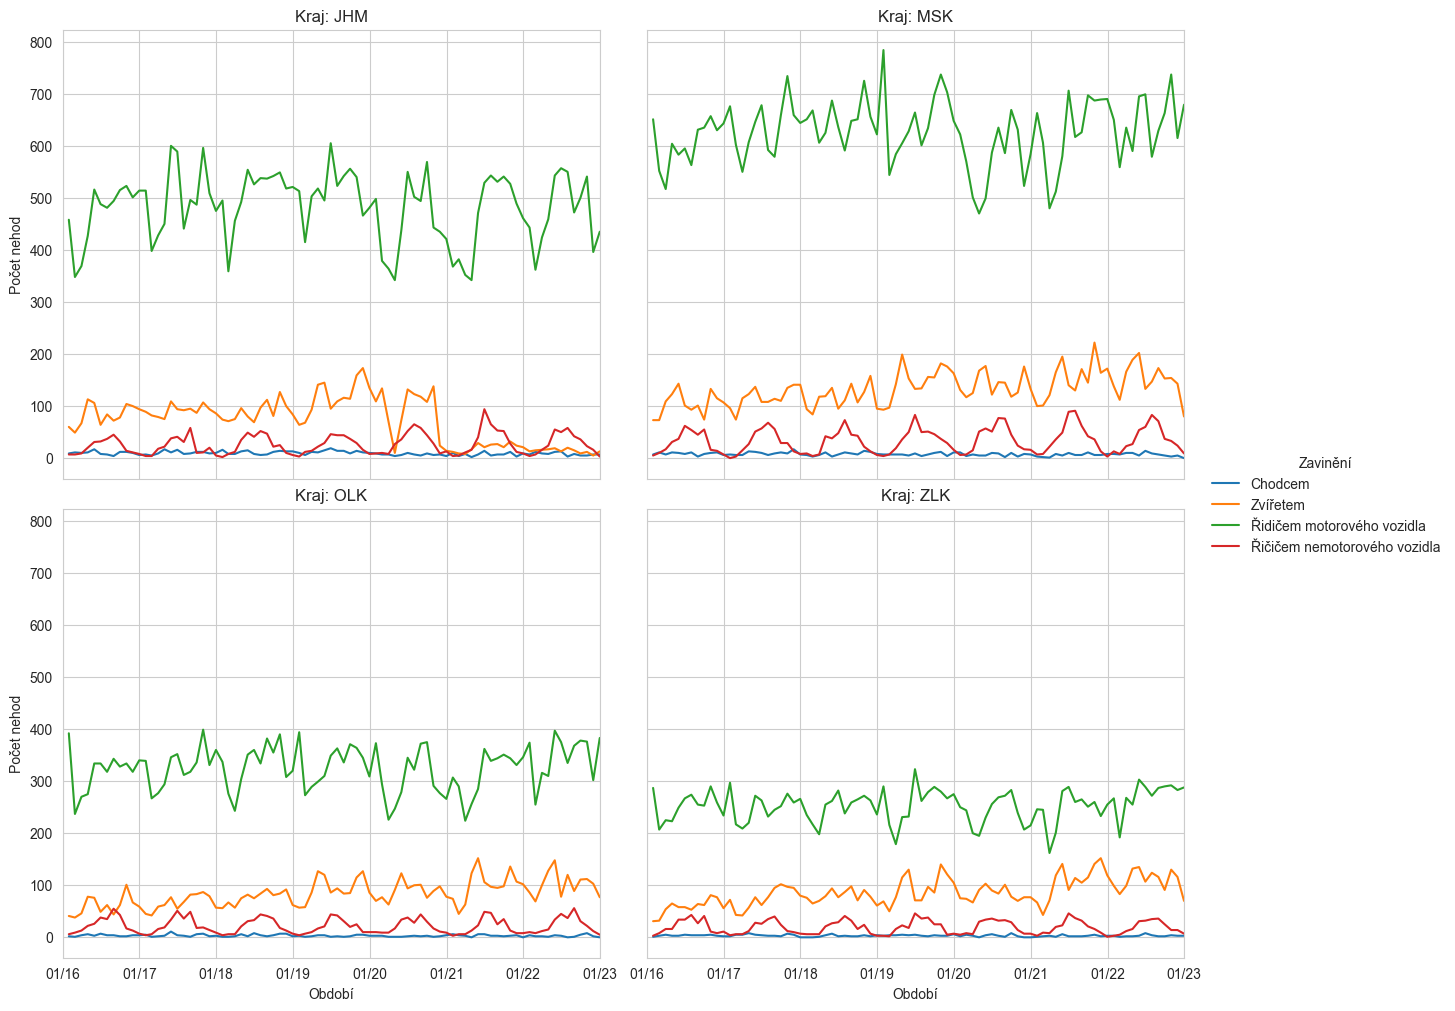

In [491]:
plot_fault(modified_df, "03_fault.png")